In [1]:
from numpy.random import RandomState
import matplotlib.pyplot as plt

from utils import *

# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

from sklearn import manifold, datasets

rng = RandomState(0)

n_samples = 200
S_points, S_color = datasets.make_s_curve(n_samples, random_state=rng)

INFO: Using numpy backend


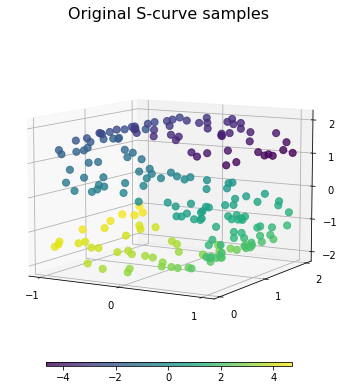

In [2]:


plot_3d(S_points, S_color, "Original S-curve samples")

In [3]:
n_neighbors = 12  # neighborhood which is used to recover the locally linear structure
n_components = 2  # number of coordinates for the manifold

In [4]:
params = {
    "n_neighbors": n_neighbors,
    "n_components": n_components,
    "eigen_solver": "auto",
    "random_state": rng,
}

lle_standard = manifold.LocallyLinearEmbedding(method="standard", **params)
S_standard = lle_standard.fit_transform(S_points)

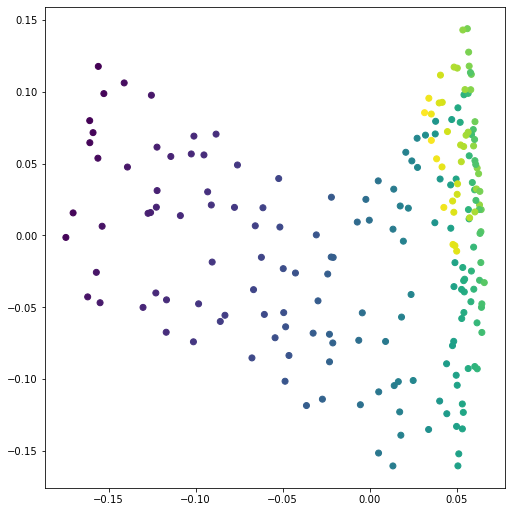

In [5]:
fig, axs = plt.subplots(
    nrows=1, ncols=1, figsize=(7, 7), facecolor="white", constrained_layout=True
)
axs.scatter(S_standard[:,0], S_standard[:,1],c=S_color)

plt.show()

In [6]:
from geomstats.geometry.pullback_metric import PullbackMetric
from geomstats.learning.knn import KNearestNeighborsClassifier
from geomstats.geometry.euclidean import Euclidean

coords = Euclidean(dim=3)
metric = coords.metric

from sklearn.cluster import KMeans

data = S_points
kmeans = KMeans( 1)
kmeans.fit(data)
labels = kmeans.predict(data)

k_nearest_vals = Compute_neighbours(data, labels, metric, n_neighbors)


K-nearest values of each point:
[[  0  84  50 136  11   3 105 157  88 187   2 106]
 [  1 188 119 148 162  39  42 168  44 178 100  18]
 [  2  36 125  35  37 181 153  50  84  88 136 105]]


In [7]:

# Compute W
from utils import *
M = Compute_W(data, metric ,k_nearest_vals, n_samples, n_neighbors )


In [14]:
embedding, _  = null_space(M,2)
result = embedding

NameError: name 'ax' is not defined

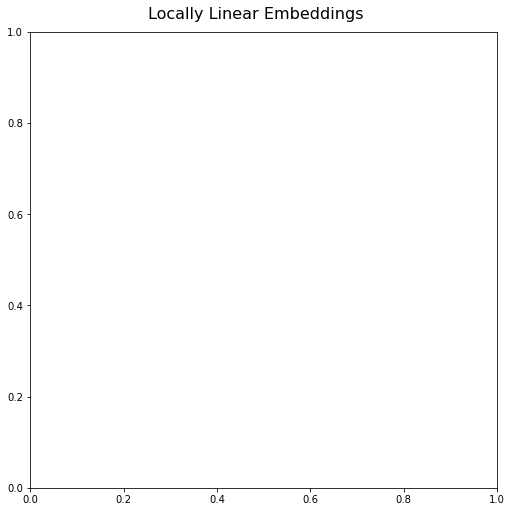

In [9]:
fig, axs = plt.subplots(
    nrows=1, ncols=1, figsize=(7, 7), facecolor="white", constrained_layout=True
)
fig.suptitle("Locally Linear Embeddings", size=16)

lle_methods = [
    ("Standard locally linear embedding", result)
]

add_2d_scatter(ax, result, S_color, name)

In [16]:
# Find y vectors
n_dimensions = n_components
optim = Optimize_y(M, n_samples,n_components)
obj = optim.mimimize()


In [17]:
result = obj.x
result =  np.reshape(result,(n_samples, n_dimensions))


In [18]:
result = np.asarray(result , dtype=object)

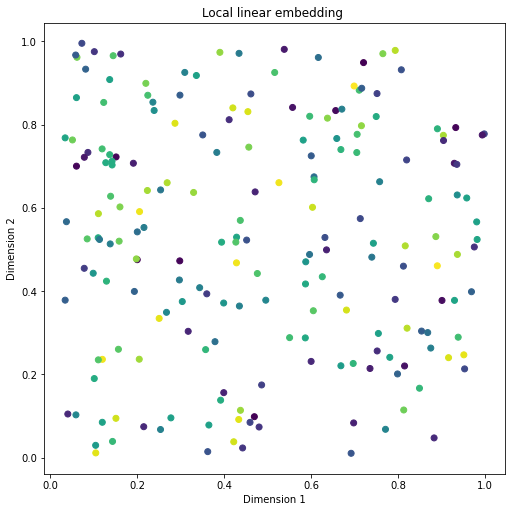

In [19]:


fig, axs = plt.subplots(
    nrows=1, ncols=1, figsize=(7, 7), facecolor="white", constrained_layout=True
)


axs.scatter(result[:,0], result[:,1],c=S_color)
axs.set_title('Local linear embedding ')
axs.set_xlabel('Dimension 1')
axs.set_ylabel('Dimension 2')
plt.show()

In [ ]:
# Validate the values of the weight matrix
linear_combos = []
neighborhood_weights = []
for i in range(len(data)):
    weights = W.toarray()[i][k_nearest_vals[i]]
    neighborhood = data[k_nearest_vals[i]]
    weighted_neighbors = weights.reshape(-1,1)*neighborhood
    lin_x1 = np.sum(weighted_neighbors[:,0])
    lin_x2 = np.sum(weighted_neighbors[:,1])
    lin_x3 = np.sum(weighted_neighbors[:,2])
    linear_combos.append([lin_x1, lin_x2, lin_x3])
    neighborhood_weights.append(weights)
linear_X = np.array(linear_combos)

fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(121)
ax.scatter(linear_X[:,0], linear_X[:,2], c='red', s=50, label='Linear Reconstruction')
ax.scatter(data[:,0], data[:,2], c='blue', s=10, label='Original Data')
ax.set_title('Local Linear Combinations')
ax.set_xlabel("Dimension 0")
ax.set_ylabel("Dimension 2")
ax.legend(loc='upper left');

ax2 = fig.add_subplot(122)
ax2.scatter(linear_X[:,0], linear_X[:,1], c='red', s=50, label='Linear Reconstruction')
ax2.scatter(data[:,0], data[:,1], c='blue', s=10, label='Original Data')
ax2.set_title('Local Linear Combinations')
ax.set_xlabel("Dimension 0")
ax.set_ylabel("Dimension 1")
ax2.legend(loc='upper left');

In [ ]:
print('Reconstruction error: ')
np.sum([np.linalg.norm(data[i] - linear_X[i]) for i in range(len(data))])

In [ ]:
print('Reconstruction error: ')
np.sum([np.linalg.norm(data[i] - result[i]) for i in range(len(data))])